We will use Naive Bayes to model the **Pima Indians Diabetes** dataset. This model will predict which people are likely to develop diabetes.

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Disease. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger datbase. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

## Import libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell

%matplotlib inline

InteractiveShell.ast_node_interactivity = "all"

sns.set(color_codes=True)
sns.set_style(style="darkgrid")

## Load and review data

In [4]:
data = pd.read_csv("pima-indians-diabetes.csv")

data.shape
data.head()
data.isnull().values.any()

(768, 9)

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


False

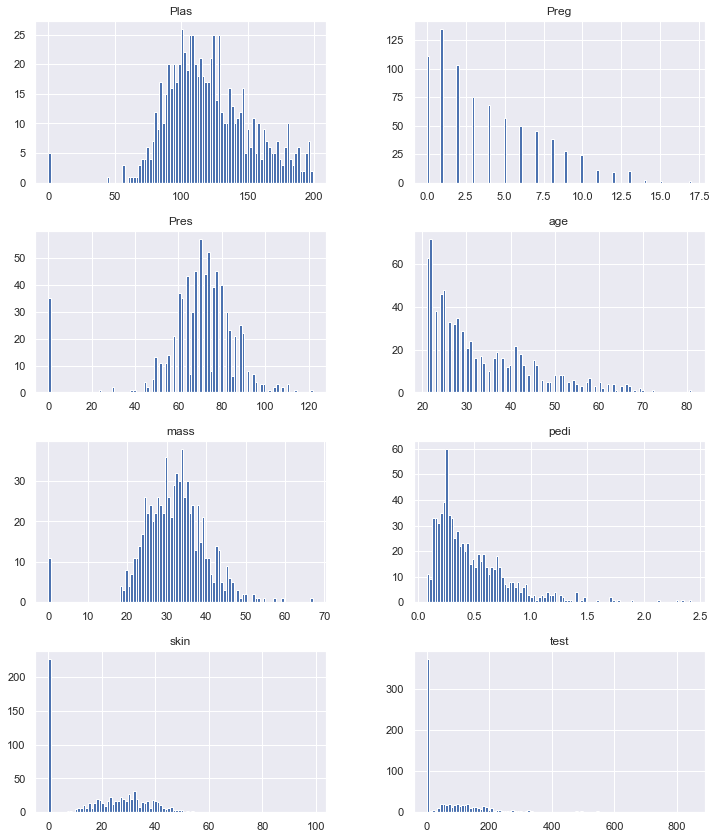

In [8]:
columns = list(data)[0:-1]
data[columns].hist(stacked=False, bins=100, figsize=(12,30), layout=(8,2));

## Indentify correlation in data

In [9]:
data.corr()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
Preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Plas,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
Pres,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
test,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
mass,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedi,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
class,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


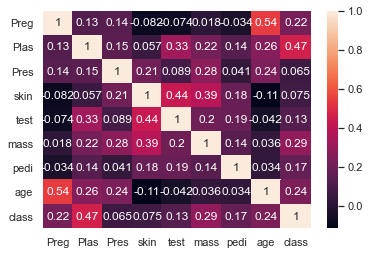

In [12]:
sns.heatmap(data.corr(), annot=True);